# Matplotlib - Plotting Data from yFinance

Matplotlib is a plotting library in Python that we will be using throughout this course for our visualizations.

First, we begin by importing the library needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

We can plot line graphs using `plt.plot()`. To show your plot at the end, add in a `plt.show()`. Line graphs are typically used to show data over time, i.e. time-series data. 

We are going to go through this lesson using Yahoo Finance data since you will primarily be working with this data for all your assignments.

In [2]:
meta = yf.Ticker('META')

# Get history with 1 month interval
start_date = '2022-01-01'
end_date = '2022-08-01'

meta_hist = meta.history(start=start_date, end=end_date, interval='1mo')

In [3]:
# View the data
meta_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01,338.299988,343.089996,289.010010,313.260010,427237300,0,0
2022-02-01,314.559998,328.000000,190.220001,211.029999,1128039600,0,0
2022-03-01,209.869995,231.149994,185.820007,222.360001,733274500,0,0
2022-04-01,224.550003,236.860001,169.000000,200.470001,672255000,0,0
2022-05-01,201.169998,224.300003,176.110001,193.639999,680548800,0,0


We will plot our x-values as the dates so our index and our y-values as the closing prices. Recall what you learned about how to extract data from DataFrames.

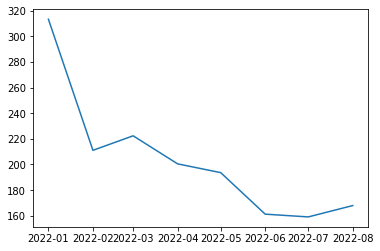

In [4]:
# Plot the values
plt.plot(meta_hist.index, meta_hist.Close)

plt.show()

As you can see, this plots the values as a continuous set of data. Now adding some visualization and stylistic features is as simple as adding a parameter into `plt.plot()`.

#### Marker Options

Some of the basic marker options are:
* 'o': Circle
* '*': Star
* '.': Poin
* 'x': X 
* '+' Plus

You can experiment with the markers that you use for your points, i.e. if you want circles, stars, squares to indicate the data points. 


#### Line Style Options
This refers to the type of line you have, i.e. is it dashed or solid
* '-': Solid Line
* ':': Dotted Line
* '--': Dashed Line
* '-.': Dashed/dotted line

#### Color Reference
This is inputted using the `color` parameter.
* 'r': Red
* 'g': Green
* 'b': Blue

The rest is pretty self explanatory, typically it is the first letter of the color. 

For example, if you wanted to have a blue circle and a dotted line you would have `plt.plot(x,y, marker='o', ls=':', color='b')`.

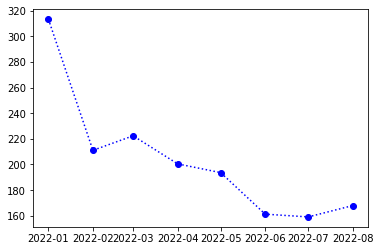

In [5]:
# Change marker to blue circle
plt.plot(meta_hist.index, meta_hist.Close, marker='o', ls=':', color='b')
plt.show()

You can learn more about the different customizations to make your plots look pretty in the documentation. 

#### Titles

Now our plots are created but they need to be labelled correctly so we add in our axes and plot titles.

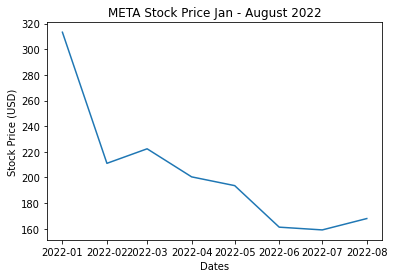

In [6]:
plt.plot(meta_hist.index, meta_hist.Close)

# Add title 
plt.title('META Stock Price Jan - August 2022')
# Add axes labels
plt.xlabel('Dates')
plt.ylabel('Stock Price (USD)')
plt.show()

Now, notice that our dates are really crammed together. We want to be able to read this, so we make them slanted using `plt.xticks(rotation=degrees)`

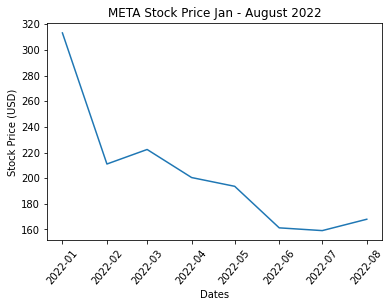

In [7]:
# Plot data
plt.plot(meta_hist.index, meta_hist.Close)

# Title and axes 
plt.title('META Stock Price Jan - August 2022')
plt.xlabel('Dates')
plt.ylabel('Stock Price (USD)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=50)


plt.show()

Now, we have a clean plot here. If you wanted to plot more than one line, you would simply add another line with `plt.plot(x,y)` with your other set of data. Note that if you are trying to superimpose two graphs within the same date range, the indices (x-axis values) should match up. 

Lastly, with regards to formatting, we'll show you how to add in a legend. 

#### Legend
To add in a legend, you use `plt.legend(loc='')`. Typically, `loc='best'` chooses the best place on your plot to place the legend (i.e. where there is the most whitespace). Make sure your legend is not blocking any of your data in your assignments.

To get the label for your legend, you need to assign a label to each `plt.plot()` line. 

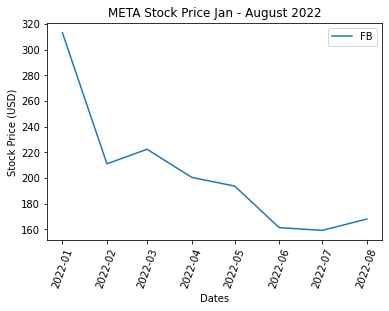

In [8]:
# Plot the data
plt.plot(meta_hist.index, meta_hist.Close, label='FB')

# Define label
plt.title('META Stock Price Jan - August 2022')
plt.xlabel('Dates')
plt.xticks(rotation=70)
plt.ylabel('Stock Price (USD)')

# Create legend
plt.legend(loc='best')

plt.show()

We will primarily be plotting line graphs since we are working with time-series financial data. However, I will go through histograms quickly as well. 

Histograms are used to see the frequency of our data, it plots our values on the x-axis and then the y-axis is the frequency of the value, i.e. how many times it occurs. This helps to see the distribution of our data.

In [9]:
# Random data
x = np.random.normal(loc=0, scale=1,size=500)

# Last 5 numbers in the data
x[:5]

array([ 0.13340936,  0.35792396,  0.12814016, -1.67275924,  1.21020895])

Text(0, 0.5, 'Frequency')

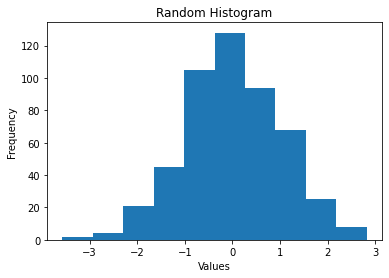

In [10]:
# Plot the histogram
plt.hist(x)

# Title and Axes Labels
plt.title('Random Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

## More Yahoo Finance and Plotting

In [11]:
# Get stock info for RY.TO
stock = yf.Ticker('RY.TO')

In [12]:
# Recall how you see all info available for a ticker
stock.info

{'zip': 'M5J 2J5',
 'sector': 'Financial Services',
 'fullTimeEmployees': 86007,
 'longBusinessSummary': "Royal Bank of Canada operates as a diversified financial service company worldwide. The company's Personal & Commercial Banking segment offers checking and savings accounts, home equity financing, personal lending, private banking, indirect lending, including auto financing, mutual funds and self-directed brokerage accounts, guaranteed investment certificates, credit cards, and payment products and solutions; and lending, leasing, deposit, investment, foreign exchange, cash management, auto dealer financing, trade products, and services to small and medium-sized commercial businesses. This segment offers financial products and services through branches, automated teller machines, and mobile sales network. Its Wealth Management segment provides a suite of advice-based solutions and strategies to high net worth and ultra-high net worth individuals, and institutional clients. The comp

All this data is stored in this `.info` as a dictionary. Some important info that we can extract from these tickers is:

In [13]:
# Industry
stock.info['industry']

'Banks—Diversified'

In [14]:
# Sector
stock.info['sector']

'Financial Services'

In [15]:
# Name
stock.info['longName']

'Royal Bank of Canada'

## Getting Historical Data

In [16]:
# Get one year of stock data
start_date = '2020-01-01'
end_date = '2021-01-05'

hist = stock.history(start=start_date, end=end_date)
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,92.616056,92.929886,92.257391,92.849190,1354100,0.0,0
2020-01-03,92.257390,92.786423,92.051161,92.508453,3199000,0.0,0
2020-01-06,92.122889,92.544320,92.078060,92.526390,3139000,0.0,0
2020-01-07,92.759523,92.992657,92.463630,92.562263,1289100,0.0,0
2020-01-08,92.544325,93.709986,92.472591,93.297523,4035100,0.0,0


Now what if we wanted to plot our data for the whole year, but only have x-axis labels for every six months?

Let's do this with closing prices.

Then we know that we would want the first available data that we have for:
* Jan 2020
* June 2020
* Jan 2021

In [17]:
# Get Closing Price as a DataFrame
close = pd.DataFrame(hist['Close'])
# Reset the index
close.reset_index(inplace=True)

In [18]:
close.head()

,Date,Close
0,2020-01-02,92.849190
1,2020-01-03,92.508453
2,2020-01-06,92.526390
3,2020-01-07,92.562263
4,2020-01-08,93.297523


We want to collect our locations of these tickers as Dates since our x-axis is Dates.

In [19]:
# First location
close.head(1)

,Date,Close
0,2020-01-02,92.84919


In [20]:
# Last location
close.tail(1)

,Date,Close
252,2021-01-04,98.221161


In [21]:
# Middle location
close[(close.Date <= '2020-06-03') & (close.Date >= '2020-05-31')]

,Date,Close
104,2020-06-01,83.708488
105,2020-06-02,85.900955
106,2020-06-03,86.561462


Our tickers would be ['2020-01-02', '2020-06-01', '2021-01-04']

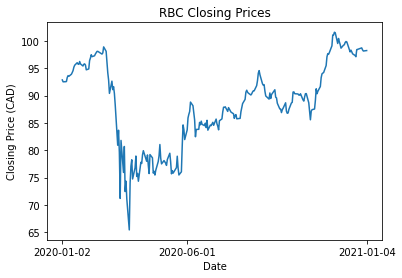

In [22]:
# Update with x and y axis
plt.plot(close.Date, close.Close)

# Update tickers here with list of tickers based on index
plt.xticks(['2020-01-02', '2020-06-01', '2021-01-04'])

# Formatting
plt.title('RBC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (CAD)')

plt.show()

Next, we'll go through how to plot subplots. In our case, we'll plot the Open and Close prices for the year of data we collected.

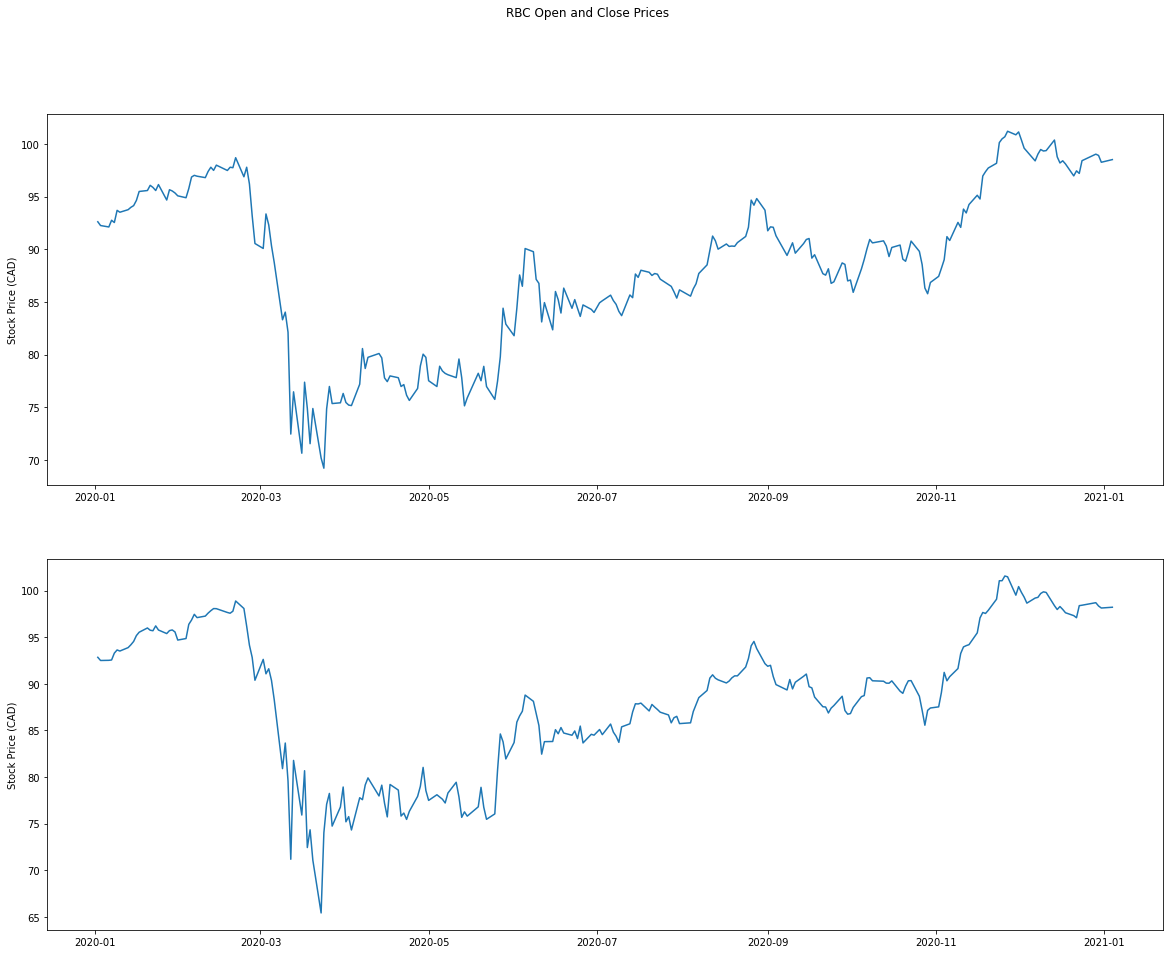

In [23]:
# Specify number of rows and columns (2,1) and define axes for each plot
fig, ((ax1), (ax2)) = plt.subplots(2, 1)

# Set size of the plot
fig.set_size_inches(20, 15)

# Overall title
fig.suptitle('RBC Open and Close Prices')

# Subplot 1 
ax1.plot(hist.index, hist.Open)

# Subplot 2
ax2.plot(hist.index, hist.Close)

# Formatting 
ax1.set_ylabel("Stock Price (CAD)")
ax2.set_ylabel("Stock Price (CAD)")

plt.show()

**NOTE**: If you wanted to set the tickers for a subplot, you need to call the specific axes, i.e. `ax1` and use `.set_xticks(indices_list)` instead of `plt.xticks`. This only works for one plot.

#### Auxiliary Lines 

Now, let's say we are interested in seeing the differences between the Open and Close prices. We can visualize this distribution using a scatter plot. We want to see how this distribution varies around the horizontal y=0 line so we plot a blue scatter plot and a red horizontal line.

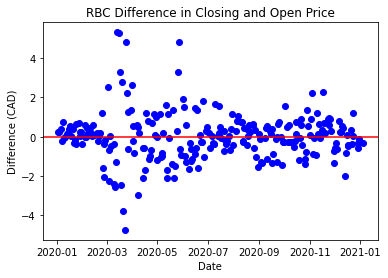

In [24]:
# Plot the data
plt.scatter(hist.index, hist.Close - hist.Open, color='b')
plt.axhline(y=0, color='r', linestyle = '-')

# Set axis and title
plt.title('RBC Difference in Closing and Open Price')
plt.xlabel('Date')
plt.ylabel('Difference (CAD)')
plt.show()

We can see here that our prices are usually around the 0-2; however in some cases there is a lot of variation between our closing and open prices.